In [3]:
from __future__ import print_function #for compatibility beteen python2 and python3
import os
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import csv

In [4]:
try:
    import urllib2 as urllib
except ImportError:
    import urllib as urlb
import os
import sys
import io
from pandas import Series

In [2]:
# changed the .zip to .cvs in files
# !curl https://data.cityofnewyork.us/api/views/57mv-nv28/rows.csv?accessType=DOWNLOAD > crime_nyc.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1494M    0 1494M    0     0  2904k      0 --:--:--  0:08:46 --:--:-- 2852k  0 --:--:--  0:00:06 --:--:-- 2790k    0  194M    0     0  2886k      0 --:--:--  0:01:09 --:--:-- 2888k283M    0     0  2900k      0 --:--:--  0:01:40 --:--:-- 2965k3009k442M    0     0  2906k      0 --:--:--  0:02:36 --:--:-- 2900k     0 --:--:--  0:07:42 --:--:-- 2778k9M    0     0  2904k      0 --:--:--  0:07:45 --:--:-- 2921k


In [5]:
crime_nyc = pd.read_csv('crime_nyc.csv', infer_datetime_format=True)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
crime_nyc.head()

CMPLNT_NUM CMPLNT_FR_DT CMPLNT_FR_TM CMPLNT_TO_DT CMPLNT_TO_TM      RPT_DT  \
0   849201806   03/06/2013     10:00:00   03/06/2013     10:05:00  03/12/2013   
1   502279651   03/06/2013     03:30:00   03/06/2013     03:35:00  03/12/2013   
2   917945135   03/05/2013     16:05:00   03/05/2013     16:07:00  03/12/2013   
3   808470177   03/05/2013     15:00:00          NaN          NaN  03/12/2013   
4   367579534   03/05/2013     14:30:00   03/05/2013     14:30:00  03/12/2013   

   KY_CD                      OFNS_DESC  PD_CD  \
0    112                    THEFT-FRAUD  739.0   
1    105                        ROBBERY  386.0   
2    109                  GRAND LARCENY  419.0   
3    361  OFF. AGNST PUB ORD SENSBLTY &  639.0   
4    361  OFF. AGNST PUB ORD SENSBLTY &  639.0   

                              PD_DESC              ...                \
0           FRAUD,UNCLASSIFIED-FELONY              ...                 
1  ROBBERY,PERSONAL ELECTRONIC DEVICE              ...                 
2      LARCENY,GRAND FROM PERSON,UNCL              ...                 
3             AGGRAVATED HARASSMENT 2              ...                 
4             AGGRAVATED HARASSMENT 2              ...                 

  ADDR_PCT_CD LOC_OF_OCCUR_DESC               PREM_TYP_DESC PARKS_NM  \
0        90.0            INSIDE      RESIDENCE - APT. HOUSE      NaN   
1        32.0               NaN                      STREET      NaN   
2        66.0            INSIDE                        BANK      NaN   
3        47.0            INSIDE      RESIDENCE - APT. HOUSE      NaN   
4        46.0          FRONT OF  RESIDENCE - PUBLIC HOUSING      NaN   

                     HADEVELOPT X_COORD_CD Y_COORD_CD   Latitude  Longitude  \
0                           NaN  1004061.0   196693.0  40.706540 -73.928547   
1                           NaN  1000883.0   236356.0  40.815411 -73.939911   
2                           NaN   982493.0   171934.0  40.638604 -74.006332   
3                           NaN  1021403.0   261063.0  40.883162 -73.865642   
4  WEST TREMONT REHAB (GROUP 3)  1006344.0   247971.0  40.847279 -73.920144   

                         Lat_Lon  
0  (40.706539649, -73.928546994)  
1  (40.815410927, -73.939911295)  
2    (40.63860374, -74.00633215)  
3  (40.883161804, -73.865641723)  
4  (40.847278789, -73.920144058)  

[5 rows x 24 columns]

In [7]:
crime_nyc.columns

Index(['CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'CMPLNT_TO_DT',
       'CMPLNT_TO_TM', 'RPT_DT', 'KY_CD', 'OFNS_DESC', 'PD_CD', 'PD_DESC',
       'CRM_ATPT_CPTD_CD', 'LAW_CAT_CD', 'JURIS_DESC', 'BORO_NM',
       'ADDR_PCT_CD', 'LOC_OF_OCCUR_DESC', 'PREM_TYP_DESC', 'PARKS_NM',
       'HADEVELOPT', 'X_COORD_CD', 'Y_COORD_CD', 'Latitude', 'Longitude',
       'Lat_Lon'],
      dtype='object')

murder and nonnegligent homicide, 
rape (legacy & revised), 
robbery, 
aggravated assault, 
burglary, 
motor vehicle theft, 
larceny-theft, 
arson

In [8]:
crime_nyc_part1 = crime_nyc[crime_nyc.OFNS_DESC.isin(['BURGLARY', 'ARSON', 'GRAND LARCENY', 'ROBBERY',
                                                    'GRAND LARCENY OF MOTOR VEHICLE', 'FELONY ASSAULT', 
                                                    'RAPE', 
                                                    'MURDER & NON-NEGL. MANSLAUGHTER'])]

In [9]:
crime_nyc_part1 = crime_nyc_part1[crime_nyc_part1.CMPLNT_FR_DT.str[-4:].isin(['2017', '2016', '2015', '2014', '2013', 
                                                                              '2012', '2011', '2010', '2009', '2008'])]

In [10]:
crime_nyc_part1['CMPLNT_FR_DT'] = pd.to_datetime(crime_nyc_part1['CMPLNT_FR_DT'])

In [11]:
crime_nyc_part1['Date'] = crime_nyc_part1['CMPLNT_FR_DT'] - pd.to_timedelta(7, unit='d')

### --------Jumping the Whole year Clustering part from here-------->

.........

In [24]:
crime_nyc_part1 = crime_nyc_part1.groupby(['CMPLNT_FR_DT',
                         'OFNS_DESC'])['OFNS_DESC'].count().unstack().reset_index().sort_values(by=['CMPLNT_FR_DT'])

In [15]:
crime_nyc_part1['CRIME_SUM'] = crime_nyc_part1[['ARSON', 'BURGLARY', 'FELONY ASSAULT', 'GRAND LARCENY' ,'GRAND LARCENY OF MOTOR VEHICLE',
                'MURDER & NON-NEGL. MANSLAUGHTER', 'RAPE', 'ROBBERY']].sum(axis = 1, skipna = True) 

In [16]:
crime_nyc_part1.head()

OFNS_DESC CMPLNT_FR_DT  ARSON  BURGLARY  FELONY ASSAULT  GRAND LARCENY  \
0           2008-01-01    5.0      41.0           130.0          224.0   
1           2008-01-02    8.0      55.0            24.0          102.0   
2           2008-01-03    3.0      65.0            32.0          105.0   
3           2008-01-04    4.0      71.0            35.0          131.0   
4           2008-01-05    9.0      50.0            50.0          126.0   

OFNS_DESC  GRAND LARCENY OF MOTOR VEHICLE  MURDER & NON-NEGL. MANSLAUGHTER  \
0                                    29.0                              4.0   
1                                    35.0                              1.0   
2                                    33.0                              NaN   
3                                    38.0                              3.0   
4                                    43.0                              3.0   

OFNS_DESC  RAPE  ROBBERY  CRIME_SUM  
0          50.0     53.0      536.0  
1           2.0     49.0      276.0  
2           4.0     63.0      305.0  
3           6.0     61.0      349.0  
4           4.0     66.0      351.0

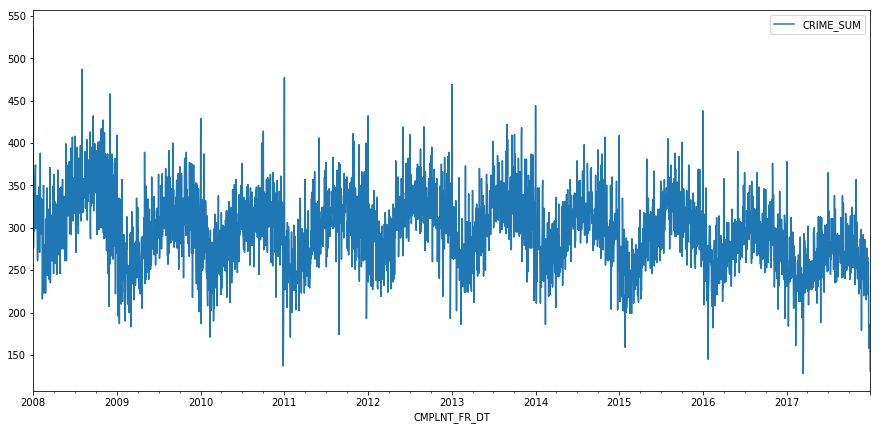

In [11]:
f, ax = plt.subplots(figsize=(15,7))
crime_nyc_part1.plot(x='CMPLNT_FR_DT', y='CRIME_SUM', ax=ax)
#ax.set_ylabel("")
plt.show()

In [18]:
crime_nyc_part1

OFNS_DESC CMPLNT_FR_DT  ARSON  BURGLARY  FELONY ASSAULT  GRAND LARCENY  \
0           2008-01-01    5.0      41.0           130.0          224.0   
1           2008-01-02    8.0      55.0            24.0          102.0   
2           2008-01-03    3.0      65.0            32.0          105.0   
3           2008-01-04    4.0      71.0            35.0          131.0   
4           2008-01-05    9.0      50.0            50.0          126.0   
5           2008-01-06   10.0      43.0            50.0           95.0   
6           2008-01-07   11.0      71.0            46.0          120.0   
7           2008-01-08    5.0      74.0            36.0          129.0   
8           2008-01-09    5.0      68.0            26.0          116.0   
9           2008-01-10    3.0      57.0            51.0          146.0   
10          2008-01-11    3.0      76.0            50.0          119.0   
11          2008-01-12    5.0      49.0            35.0          119.0   
12          2008-01-13    9.0      45.0            73.0           99.0   
13          2008-01-14    4.0      42.0            35.0          118.0   
14          2008-01-15    4.0      47.0            27.0          138.0   
15          2008-01-16    9.0      63.0            26.0          117.0   
16          2008-01-17    5.0      70.0            26.0          118.0   
17          2008-01-18    3.0      79.0            41.0          116.0   
18          2008-01-19    4.0      54.0            30.0           97.0   
19          2008-01-20    9.0      38.0            34.0           82.0   
20          2008-01-21   11.0      49.0            47.0           88.0   
21          2008-01-22    5.0      60.0            36.0          115.0   
22          2008-01-23    5.0      59.0            29.0          105.0   
23          2008-01-24    1.0      48.0            35.0          134.0   
24          2008-01-25    6.0      74.0            28.0          136.0   
25          2008-01-26    4.0      42.0            42.0           96.0   
26          2008-01-27    2.0      39.0            49.0           88.0   
27          2008-01-28    1.0      67.0            39.0          110.0   
28          2008-01-29    7.0      55.0            25.0          108.0   
29          2008-01-30    5.0      60.0            28.0          110.0   
...                ...    ...       ...             ...            ...   
3623        2017-12-02    2.0      25.0            54.0          100.0   
3624        2017-12-03    6.0      24.0            54.0           79.0   
3625        2017-12-04    NaN      37.0            52.0          118.0   
3626        2017-12-05    3.0      35.0            41.0          122.0   
3627        2017-12-06    2.0      35.0            46.0          106.0   
3628        2017-12-07    1.0      37.0            37.0          117.0   
3629        2017-12-08    1.0      42.0            50.0          120.0   
3630        2017-12-09    2.0      35.0            51.0          101.0   
3631        2017-12-10    1.0      26.0            52.0           92.0   
3632        2017-12-11    4.0      28.0            44.0          101.0   
3633        2017-12-12    2.0      41.0            44.0          111.0   
3634        2017-12-13    NaN      36.0            53.0           87.0   
3635        2017-12-14    NaN      32.0            45.0           93.0   
3636        2017-12-15    5.0      35.0            39.0          124.0   
3637        2017-12-16    1.0      37.0            50.0          120.0   
3638        2017-12-17    2.0      18.0            53.0           98.0   
3639        2017-12-18    2.0      37.0            50.0           94.0   
3640        2017-12-19    2.0      29.0            54.0           84.0   
3641        2017-12-20    3.0      41.0            48.0          111.0   
3642        2017-12-21    2.0      41.0            52.0           95.0   
3643        2017-12-22    NaN      43.0            48.0           86.0   
3644        2017-12-23    1.0      34.0            49.0          105.0   
3645

### Weekly aggregation (old)

In [12]:
crime_nyc_weekly = crime_nyc_part1.groupby([pd.Grouper(key='Date', 
                                    freq='W-MON')])['CRIME_SUM'].sum().reset_index().sort_values('Date')

In [17]:
crime_nyc_weekly.head()

Date  CRIME_SUM
0 2007-12-31     2473.0
1 2008-01-07     2320.0
2 2008-01-14     2101.0
3 2008-01-21     2160.0
4 2008-01-28     2198.0

In [16]:
#crime_nyc_weekly.to_csv('nyc_weekly')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


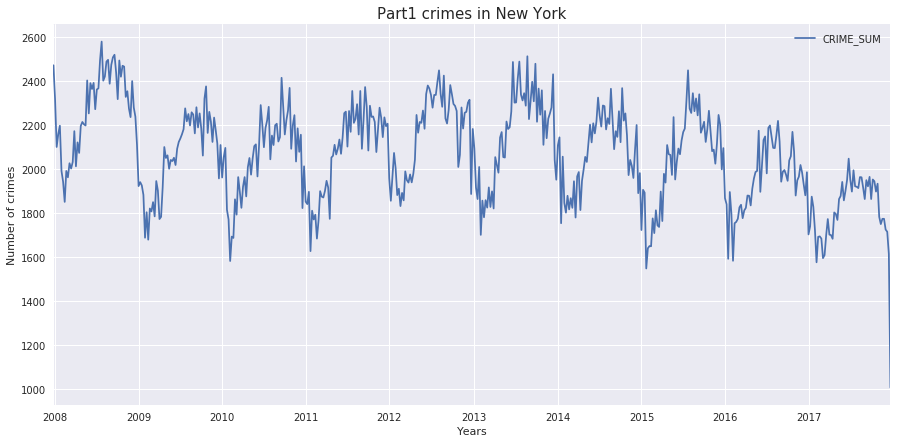

In [125]:
f, ax = plt.subplots(figsize=(15,7))
crime_nyc_weekly.plot(x='Date', y='CRIME_SUM', ax=ax)
#ax.set_ylabel("")
plt.title("Part1 crimes in New York", size=15)
plt.ylabel('Number of crimes')
plt.xlabel('Years')
plt.show()

In [ ]:
crime_nyc_part1[['CMPLNT_FR_DT',]]

len(set(crime_nyc.PD_DESC))

In [290]:
len(set(crime_nyc.OFNS_DESC))

71

### Crime Temporal & Making Gif

In [119]:
crime_nyc_temp = crime_nyc[crime_nyc.OFNS_DESC.isin(['BURGLARY', 'ARSON', 'GRAND LARCENY', 'ROBBERY',
                                                    'GRAND LARCENY OF MOTOR VEHICLE', 'FELONY ASSAULT', 
                                                    'RAPE', 
                                                    'MURDER & NON-NEGL. MANSLAUGHTER'])]

In [120]:
crime_nyc_temp = crime_nyc_temp[crime_nyc_temp.CMPLNT_FR_DT.str[-4:].isin(['2017', '2016', '2015', '2014', '2013', 
                                                                           '2012', '2011', '2010', '2009', '2008'])]

In [121]:
crime_nyc_temp['CMPLNT_FR_DT'] = pd.to_datetime(crime_nyc_temp['CMPLNT_FR_DT'])

In [22]:
crime_nyc_temp.head()

CMPLNT_NUM CMPLNT_FR_DT CMPLNT_FR_TM CMPLNT_TO_DT CMPLNT_TO_TM  \
1    502279651   2013-03-06     03:30:00   03/06/2013     03:35:00   
2    917945135   2013-03-05     16:05:00   03/05/2013     16:07:00   
10   922701841   2013-03-05     13:00:00   03/05/2013     15:00:00   
21   477304889   2013-03-04     17:00:00          NaN          NaN   
23   359922234   2013-03-04     14:00:00   03/06/2013     22:00:00   

        RPT_DT  KY_CD      OFNS_DESC  PD_CD  \
1   03/12/2013    105        ROBBERY  386.0   
2   03/12/2013    109  GRAND LARCENY  419.0   
10  03/12/2013    109  GRAND LARCENY  405.0   
21  03/12/2013    109  GRAND LARCENY  438.0   
23  03/12/2013    109  GRAND LARCENY  403.0   

                                              PD_DESC  \
1                  ROBBERY,PERSONAL ELECTRONIC DEVICE   
2                      LARCENY,GRAND FROM PERSON,UNCL   
10              LARCENY,GRAND BY THEFT OF CREDIT CARD   
21  LARCENY,GRAND FROM BUILDING (NON-RESIDENCE) UN...   
23  LARCENY,GRAND BY BANK ACCT COMPROMISE-REPRODUC...   

                ...               ADDR_PCT_CD LOC_OF_OCCUR_DESC  \
1               ...                      32.0               NaN   
2               ...                      66.0            INSIDE   
10              ...                     100.0          FRONT OF   
21              ...                      78.0            INSIDE   
23              ...                      67.0            INSIDE   

             PREM_TYP_DESC PARKS_NM  HADEVELOPT X_COORD_CD Y_COORD_CD  \
1                   STREET      NaN         NaN  1000883.0   236356.0   
2                     BANK      NaN         NaN   982493.0   171934.0   
10         RESIDENCE-HOUSE      NaN         NaN  1028254.0   149548.0   
21         RESIDENCE-HOUSE      NaN         NaN   989354.0   184406.0   
23  RESIDENCE - APT. HOUSE      NaN         NaN   999459.0   174711.0   

     Latitude  Longitude                        Lat_Lon  
1   40.815411 -73.939911  (40.815410927, -73.939911295)  
2   40.638604 -74.006332    (40.63860374, -74.00633215)  
10  40.577050 -73.841595  (40.577049716, -73.841595141)  
21  40.672835 -73.981602   (40.67283536, -73.981601607)  
23  40.646213 -73.945195  (40.646213127, -73.945195116)  

[5 rows x 24 columns]

In [23]:
crime_nyc_temp = crime_nyc_temp[['CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'OFNS_DESC',
                                 'Longitude', 'Latitude']]

In [26]:
import geopandas as gpd
import shapely
# combine lat and lon to one column
crime_nyc_temp['lonlat'] = list(zip(crime_nyc_temp.Longitude, crime_nyc_temp.Latitude))
# Create Point Geometry for based on lonlat column
crime_nyc_temp['geometry'] = crime_nyc_temp[['lonlat']].applymap(lambda x:shapely.geometry.Point(x))
crime_nyc_temp.head()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


CMPLNT_FR_DT CMPLNT_FR_TM      OFNS_DESC  Longitude   Latitude  \
1    2013-03-06     03:30:00        ROBBERY -73.939911  40.815411   
2    2013-03-05     16:05:00  GRAND LARCENY -74.006332  40.638604   
10   2013-03-05     13:00:00  GRAND LARCENY -73.841595  40.577050   
21   2013-03-04     17:00:00  GRAND LARCENY -73.981602  40.672835   
23   2013-03-04     14:00:00  GRAND LARCENY -73.945195  40.646213   

                           lonlat                                 geometry  
1   (-73.939911295, 40.815410927)  POINT (-73.939911295 40.81541092699999)  
2     (-74.00633215, 40.63860374)   POINT (-74.00633215000001 40.63860374)  
10  (-73.841595141, 40.577049716)       POINT (-73.841595141 40.577049716)  
21   (-73.981601607, 40.67283536)        POINT (-73.981601607 40.67283536)  
23  (-73.945195116, 40.646213127)  POINT (-73.94519511600001 40.646213127)

In [34]:
crime_nyc_temp = gpd.GeoDataFrame(crime_nyc_temp)

In [35]:
crime_nyc_temp.crs = from_epsg(4326)
crime_nyc_temp.crs

{'init': 'epsg:4326', 'no_defs': True}

In [36]:
crime_nyc_temp_with_tracks = gpd.sjoin(census_track, crime_nyc_temp, op='contains')

In [41]:
crime_nyc_temp_with_tracks.head(2)

boro_code boro_ct201      boro_name cdeligibil  ct2010 ctlabel ntacode  \
0         5    5000900  Staten Island          I  000900       9    SI22   
0         5    5000900  Staten Island          I  000900       9    SI22   

                                     ntaname  puma    shape_area   shape_leng  \
0  West New Brighton-New Brighton-St. George  3903  2.497010e+06  7729.016794   
0  West New Brighton-New Brighton-St. George  3903  2.497010e+06  7729.016794   

                                            geometry  index_right  \
0  POLYGON ((-74.07920577013245 40.64343078374567...      5704222   
0  POLYGON ((-74.07920577013245 40.64343078374567...      3402500   

  CMPLNT_FR_DT CMPLNT_FR_TM OFNS_DESC  Longitude   Latitude  \
0   2013-11-04     08:14:00   ROBBERY -74.082073  40.644215   
0   2008-05-20     01:40:00   ROBBERY -74.081943  40.644037   

                          lonlat  
0   (-74.082073348, 40.64421516)  
0  (-74.081943405, 40.644036842)

In [43]:
crime_temp = crime_nyc_temp_with_tracks[['boro_ct201', 'CMPLNT_FR_DT', 'OFNS_DESC']]

In [49]:
crime_temp['YEAR'] = crime_temp['CMPLNT_FR_DT'].dt.year
crime_temp['MONTH'] = crime_temp['CMPLNT_FR_DT'].dt.month

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [50]:
crime_temp.head()

boro_ct201 CMPLNT_FR_DT      OFNS_DESC  YEAR  MONTH
0    5000900   2013-11-04        ROBBERY  2013     11
0    5000900   2008-05-20        ROBBERY  2008      5
0    5000900   2008-11-16  GRAND LARCENY  2008     11
0    5000900   2008-04-10  GRAND LARCENY  2008      4
0    5000900   2016-11-25        ROBBERY  2016     11

In [52]:
crime_temp_boro = crime_temp.groupby(['boro_ct201', 'YEAR'])['OFNS_DESC'].count().unstack().reset_index()

In [53]:
crime_temp_boro = crime_temp_boro.merge(census_track, left_on="boro_ct201", right_on='boro_ct201')
crime_temp_boro.head()

YEAR boro_ct201   2008   2009  2010  2011  2012  2013   2014  2015  2016  \
0       1000201   27.0   24.0  26.0  31.0  34.0  18.0   37.0  39.0  33.0   
1       1000202   48.0   35.0  50.0  42.0  53.0  43.0   28.0  38.0  42.0   
2       1000500    NaN    NaN   NaN   1.0   NaN   NaN    NaN   NaN   NaN   
3       1000600   91.0   92.0  75.0  90.0  98.0  89.0  100.0  94.0  90.0   
4       1000700  121.0  101.0  84.0  68.0  81.0  79.0   82.0  96.0  88.0   

YEAR                        ...                          boro_name cdeligibil  \
0                           ...                          Manhattan          E   
1                           ...                          Manhattan          E   
2                           ...                          Manhattan          I   
3                           ...                          Manhattan          E   
4                           ...                          Manhattan          I   

YEAR  ct2010 ctlabel ntacode                            ntaname  puma  \
0     000201    2.01    MN28                    Lower East Side  3809   
1     000202    2.02    MN28                    Lower East Side  3809   
2     000500       5    MN99        park-cemetery-etc-Manhattan  3810   
3     000600       6    MN28                    Lower East Side  3809   
4     000700       7    MN25  Battery Park City-Lower Manhattan  3810   

YEAR    shape_area    shape_leng  \
0     9.715994e+05   4748.325960   
1     3.315114e+06   8568.089235   
2     9.081808e+06  32407.898377   
3     2.583418e+06   6970.634699   
4     2.442012e+06   9802.917997   

YEAR                                           geometry  
0     POLYGON ((-73.98449647076764 40.70950966393941...  
1     (POLYGON ((-73.98237340572007 40.7055433504376...  
2     (POLYGON ((-74.01092841268031 40.6844914725429...  
3     POLYGON ((-73.99022012603876 40.71440493989796...  
4     (POLYGON ((-73.99799957540132 40.6987976855442...  

[5 rows x 22 columns]

In [65]:
crime_temp_boro = gpd.GeoDataFrame(crime_temp_boro)

In [78]:
crime_temp_boro = crime_temp_boro.rename(index=str, columns={2008: "2008"})

In [81]:
crime_temp_boro = crime_temp_boro.rename(index=str, columns={2009: "2009", 2010: "2010", 2011: "2011", 
                                                             2012: "2012", 2013: "2013", 2014: "2014",
                                                             2015: "2015", 2016: "2016", 2017: "2017"})

In [84]:
# save all the maps in the charts folder
output_path = 'charts/maps'

# counter for the for loop
i = 0

# list of years (which are the column names at the moment)
list_of_years = ['2008','2009','2010','2011','2012','2013','2014','2015','2016','2017']

In [83]:
# set the min and max range for the choropleth map
vmin, vmax = 0, 1000

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/function_base.py:3142: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


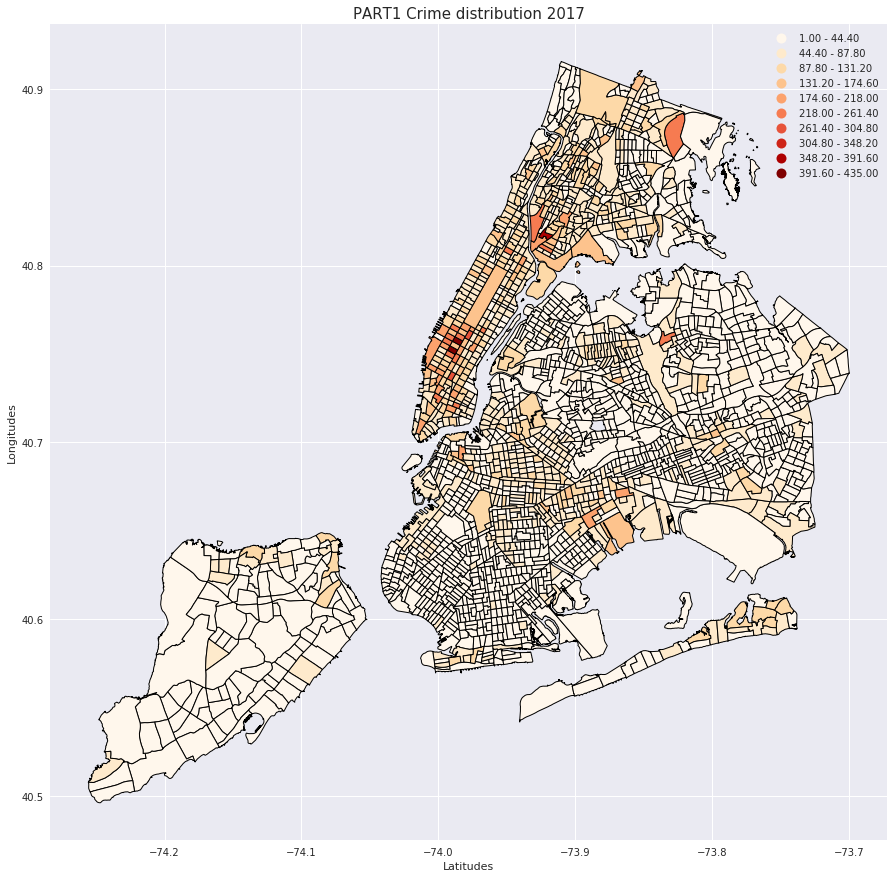

In [186]:
#### from matplotlib.colors import Normalize
from matplotlib import cm
f, ax = plt.subplots(figsize=(15,15))
ax.get_xaxis().set_visible(True)
ax.get_yaxis().set_visible(True)
crime_temp_boro[crime_temp_boro['boro_ct201'] != '2000100'].plot(column='2017',cmap='OrRd',alpha=1,
                  lw=1, ax=ax, scheme="Equal_interval", edgecolor="black", legend=True, k=10)
#linkNYC.plot(ax=ax, marker='o', c="date_link_", 
             #markersize=5, cmap="OrRd")
#norm = Normalize(vmin=df_bars['Night1'].min(), vmax=df_bars['Night1'].max())
#n_cmap = cm.ScalarMappable(norm=norm, cmap='bone')
#n_cmap.set_array([])
#ax.get_figure().colorbar(n_cmap)
plt.title("PART1 Crime distribution 2017", size=15)
plt.ylabel('Longitudes')
plt.xlabel('Latitudes')
plt.show()

In [95]:
# start the for loop to create one map per year
for year in list_of_years:
    
    # create map, UDPATE: added plt.Normalize to keep the legend range the same for all maps
    fig = crime_temp_boro[crime_temp_boro['boro_ct201'] != '2000100'].plot(column=year, cmap='OrRd', alpha=1,
                                                figsize=(15,15), linewidth=0.8, edgecolor='black', legend=True, k=10)
    
    # remove axis of chart
    fig.axis('off')
    
    # add a title
    fig.set_title('Part1 crimes in NewYork', \
              fontdict={'fontsize': '25',
                         'fontweight' : '3'})
    
    # position the annotation to the bottom left
    fig.annotate(year,
            xy=(0.1, .225), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=35)
    
    # this will save the figure as a high-res png in the output path. you can also save as svg if you prefer.
    filepath = os.path.join(output_path, year+'_crime.jpg')
    chart = fig.get_figure()
    chart.savefig(filepath, dpi=300)

### Heatmaps - dayofWeek, timeofDay

In [96]:
import seaborn as sns

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [97]:
crime_temp.head()

boro_ct201 CMPLNT_FR_DT      OFNS_DESC  YEAR  MONTH
0    5000900   2013-11-04        ROBBERY  2013     11
0    5000900   2008-05-20        ROBBERY  2008      5
0    5000900   2008-11-16  GRAND LARCENY  2008     11
0    5000900   2008-04-10  GRAND LARCENY  2008      4
0    5000900   2016-11-25        ROBBERY  2016     11

In [98]:
crime_temp['dayofWeek'] = crime_temp['CMPLNT_FR_DT'].dt.dayofweek

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [101]:
crime_dayweek = crime_temp.groupby(by=['OFNS_DESC', 'dayofWeek'], as_index=False).count()[['OFNS_DESC', 
                                                                                           'dayofWeek', 'boro_ct201']]

In [102]:
crime_dayweek.head(2)

OFNS_DESC  dayofWeek  boro_ct201
0     ARSON          0        1836
1     ARSON          1        1663

In [106]:
piv_dayweek = pd.pivot_table(crime_dayweek, values="boro_ct201",index=["dayofWeek"], 
                             columns=["OFNS_DESC"], fill_value=0)

In [110]:
piv_dayweek.head()

OFNS_DESC  ARSON  BURGLARY  FELONY ASSAULT  GRAND LARCENY  \
dayofWeek                                                   
0           1836     25679           24815          61124   
1           1663     25042           24259          60483   
2           1566     26459           24099          61037   
3           1595     25907           23984          61154   
4           1640     30600           26120          68551   

OFNS_DESC  GRAND LARCENY OF MOTOR VEHICLE  MURDER & NON-NEGL. MANSLAUGHTER  \
dayofWeek                                                                    
0                                   12213                              525   
1                                   11857                              490   
2                                   11891                              489   
3                                   11870                              474   
4                                   13214                              539   

OFNS_DESC  RAPE  ROBBERY  
dayofWeek                 
0          1676    27020  
1          1705    26134  
2          1636    26159  
3          1678    25530  
4          1921    27082

In [131]:
piv_dayweek_2 = (piv_dayweek - piv_dayweek.min()) / (piv_dayweek.max() - piv_dayweek.min())

In [132]:
piv_dayweek_2 = piv_dayweek_2.rename(index=str, columns={"FELONY ASSAULT": "ASSAULT", "GRAND LARCENY": "LARCENY",
                                         "GRAND LARCENY OF MOTOR VEHICLE": "AUTO THEFT", 
                                         "MURDER & NON-NEGL. MANSLAUGHTER": "MURDER"})
piv_dayweek_2

OFNS_DESC     ARSON  BURGLARY   ASSAULT   LARCENY  AUTO THEFT    MURDER  \
dayofWeek                                                                 
0          0.553279  0.640278  0.082868  0.590460    0.346606  0.228700   
1          0.198770  0.593713  0.027423  0.555114    0.114230  0.071749   
2          0.000000  0.697295  0.011468  0.585663    0.136423  0.067265   
3          0.059426  0.656944  0.000000  0.592115    0.122715  0.000000   
4          0.151639  1.000000  0.213004  1.000000    1.000000  0.291480   
5          0.331967  0.285746  0.890606  0.472126    0.349869  1.000000   
6          1.000000  0.000000  1.000000  0.000000    0.000000  0.995516   

OFNS_DESC      RAPE   ROBBERY  
dayofWeek                      
0          0.066667  0.969015  
1          0.115000  0.526237  
2          0.000000  0.538731  
3          0.070000  0.224388  
4          0.475000  1.000000  
5          1.000000  0.270365  
6          0.876667  0.000000

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


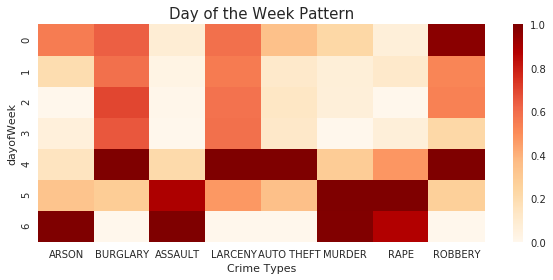

In [133]:
plt.figure(figsize=(10,4))
sns.heatmap(piv_dayweek_2, cmap='OrRd')
plt.title("Day of the Week Pattern", size=15)
#plt.ylabel('')
plt.xlabel('Crime Types')
plt.show()

### Part1 crimes Whole years

In [12]:
crime_nyc_part1.head()

CMPLNT_NUM CMPLNT_FR_DT CMPLNT_FR_TM CMPLNT_TO_DT CMPLNT_TO_TM  \
1    502279651   2013-03-06     03:30:00   03/06/2013     03:35:00   
2    917945135   2013-03-05     16:05:00   03/05/2013     16:07:00   
10   922701841   2013-03-05     13:00:00   03/05/2013     15:00:00   
21   477304889   2013-03-04     17:00:00          NaN          NaN   
23   359922234   2013-03-04     14:00:00   03/06/2013     22:00:00   

        RPT_DT  KY_CD      OFNS_DESC  PD_CD  \
1   03/12/2013    105        ROBBERY  386.0   
2   03/12/2013    109  GRAND LARCENY  419.0   
10  03/12/2013    109  GRAND LARCENY  405.0   
21  03/12/2013    109  GRAND LARCENY  438.0   
23  03/12/2013    109  GRAND LARCENY  403.0   

                                              PD_DESC    ...      \
1                  ROBBERY,PERSONAL ELECTRONIC DEVICE    ...       
2                      LARCENY,GRAND FROM PERSON,UNCL    ...       
10              LARCENY,GRAND BY THEFT OF CREDIT CARD    ...       
21  LARCENY,GRAND FROM BUILDING (NON-RESIDENCE) UN...    ...       
23  LARCENY,GRAND BY BANK ACCT COMPROMISE-REPRODUC...    ...       

   LOC_OF_OCCUR_DESC           PREM_TYP_DESC PARKS_NM HADEVELOPT  X_COORD_CD  \
1                NaN                  STREET      NaN        NaN   1000883.0   
2             INSIDE                    BANK      NaN        NaN    982493.0   
10          FRONT OF         RESIDENCE-HOUSE      NaN        NaN   1028254.0   
21            INSIDE         RESIDENCE-HOUSE      NaN        NaN    989354.0   
23            INSIDE  RESIDENCE - APT. HOUSE      NaN        NaN    999459.0   

   Y_COORD_CD   Latitude  Longitude                        Lat_Lon       Date  
1    236356.0  40.815411 -73.939911  (40.815410927, -73.939911295) 2013-02-27  
2    171934.0  40.638604 -74.006332    (40.63860374, -74.00633215) 2013-02-26  
10   149548.0  40.577050 -73.841595  (40.577049716, -73.841595141) 2013-02-26  
21   184406.0  40.672835 -73.981602   (40.67283536, -73.981601607) 2013-02-25  
23   174711.0  40.646213 -73.945195  (40.646213127, -73.945195116) 2013-02-25  

[5 rows x 25 columns]

In [13]:
crime_nyc_all = crime_nyc_part1[['CMPLNT_FR_DT','Date', 'OFNS_DESC', 'Longitude', 'Latitude']]

In [14]:
crime_nyc_all.head()

CMPLNT_FR_DT       Date      OFNS_DESC  Longitude   Latitude
1    2013-03-06 2013-02-27        ROBBERY -73.939911  40.815411
2    2013-03-05 2013-02-26  GRAND LARCENY -74.006332  40.638604
10   2013-03-05 2013-02-26  GRAND LARCENY -73.841595  40.577050
21   2013-03-04 2013-02-25  GRAND LARCENY -73.981602  40.672835
23   2013-03-04 2013-02-25  GRAND LARCENY -73.945195  40.646213

In [15]:
import geopandas as gpd
import shapely

In [16]:
# combine lat and lon to one column
crime_nyc_all['lonlat'] = list(zip(crime_nyc_all.Longitude, crime_nyc_all.Latitude))
# Create Point Geometry for based on lonlat column
crime_nyc_all['geometry'] = crime_nyc_all[['lonlat']].applymap(lambda x:shapely.geometry.Point(x))
crime_nyc_all.head()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


CMPLNT_FR_DT       Date      OFNS_DESC  Longitude   Latitude  \
1    2013-03-06 2013-02-27        ROBBERY -73.939911  40.815411   
2    2013-03-05 2013-02-26  GRAND LARCENY -74.006332  40.638604   
10   2013-03-05 2013-02-26  GRAND LARCENY -73.841595  40.577050   
21   2013-03-04 2013-02-25  GRAND LARCENY -73.981602  40.672835   
23   2013-03-04 2013-02-25  GRAND LARCENY -73.945195  40.646213   

                           lonlat                                 geometry  
1   (-73.939911295, 40.815410927)  POINT (-73.939911295 40.81541092699999)  
2     (-74.00633215, 40.63860374)   POINT (-74.00633215000001 40.63860374)  
10  (-73.841595141, 40.577049716)       POINT (-73.841595141 40.577049716)  
21   (-73.981601607, 40.67283536)        POINT (-73.981601607 40.67283536)  
23  (-73.945195116, 40.646213127)  POINT (-73.94519511600001 40.646213127)

In [17]:
crime_nyc_all = gpd.GeoDataFrame(crime_nyc_all)

In [18]:
from fiona.crs import from_epsg

In [19]:
crime_nyc_all.crs = from_epsg(4326)
crime_nyc_all.crs

{'init': 'epsg:4326', 'no_defs': True}

#### Here, go find census track and run that before moving further

In [22]:
crimeAll_with_tracks = gpd.sjoin(census_track, crime_nyc_all, op='contains')

In [23]:
crimeAll_with_tracks.head(2)

boro_code boro_ct201      boro_name cdeligibil  ct2010 ctlabel ntacode  \
0         5    5000900  Staten Island          I  000900       9    SI22   
0         5    5000900  Staten Island          I  000900       9    SI22   

                                     ntaname  puma    shape_area   shape_leng  \
0  West New Brighton-New Brighton-St. George  3903  2.497010e+06  7729.016794   
0  West New Brighton-New Brighton-St. George  3903  2.497010e+06  7729.016794   

                                            geometry  index_right  \
0  POLYGON ((-74.07920577013245 40.64343078374567...      5704222   
0  POLYGON ((-74.07920577013245 40.64343078374567...      3402500   

  CMPLNT_FR_DT       Date OFNS_DESC  Longitude   Latitude  \
0   2013-11-04 2013-10-28   ROBBERY -74.082073  40.644215   
0   2008-05-20 2008-05-13   ROBBERY -74.081943  40.644037   

                          lonlat  
0   (-74.082073348, 40.64421516)  
0  (-74.081943405, 40.644036842)

In [44]:
crimeAll_with_tracks.columns

Index(['boro_code', 'boro_ct201', 'boro_name', 'cdeligibil', 'ct2010',
       'ctlabel', 'ntacode', 'ntaname', 'puma', 'shape_area', 'shape_leng',
       'geometry', 'index_right', 'CMPLNT_FR_DT', 'Date', 'OFNS_DESC',
       'Longitude', 'Latitude', 'lonlat'],
      dtype='object')

In [ ]:
## group by daily
## crimeAll_with_tracks.groupby(['CMPLNT_FR_DT', 'boro_ct201'])['OFNS_DESC'].count().unstack().reset_index()

In [25]:
crimeAll_weekly = crimeAll_with_tracks.groupby([pd.Grouper(key='Date', freq='W-MON'), 
                              'boro_ct201'])['OFNS_DESC'].count().unstack().reset_index().sort_values('Date')

In [26]:
crimeAll_weekly.head()

boro_ct201       Date  1000201  1000202  1000500  1000600  1000700  1000800  \
0          2007-12-31      1.0      4.0      NaN      1.0      4.0      3.0   
1          2008-01-07      1.0      NaN      NaN      NaN      4.0      1.0   
2          2008-01-14      NaN      1.0      NaN      NaN      2.0      2.0   
3          2008-01-21      1.0      NaN      NaN      3.0      3.0      2.0   
4          2008-01-28      NaN      NaN      NaN      1.0      1.0      NaN   

boro_ct201  1000900  1001001  1001002   ...     5027706  5027900  5029102  \
0               3.0      1.0      2.0   ...         2.0      1.0      NaN   
1               1.0      NaN      NaN   ...         NaN      NaN      NaN   
2               2.0      NaN      1.0   ...         1.0      NaN      1.0   
3               1.0      NaN      NaN   ...         2.0      NaN      2.0   
4               2.0      NaN      1.0   ...         NaN      NaN      1.0   

boro_ct201  5029103  5029104  5030301  5030302  5031901  5031902  5032300  
0               2.0      NaN      NaN      NaN      NaN      NaN      1.0  
1               NaN      NaN      NaN      2.0      1.0      NaN      NaN  
2               1.0      1.0      NaN      NaN      1.0      2.0      1.0  
3               NaN      1.0      1.0      NaN      NaN      NaN      NaN  
4               1.0      NaN      1.0      NaN      2.0      2.0      1.0  

[5 rows x 2161 columns]

In [27]:
crimeAll_weekly.sum(axis = 0, skipna = True).sort_values(ascending=False).head(5)

boro_ct201
1010900    5518.0
1011900    4639.0
4033402    3357.0
1005200    3068.0
1004900    3050.0
dtype: float64

In [71]:
crimeAll_weekly_data1 = crimeAll_weekly[['Date', '1010900', '1011900', '4033402', '1005200', '1004900']]

In [72]:
crimeAll_weekly_data1.head()

boro_ct201       Date  1010900  1011900  4033402  1005200  1004900
0          2007-12-31      6.0     16.0      7.0      9.0      6.0
1          2008-01-07     21.0      9.0      2.0     10.0     10.0
2          2008-01-14     14.0      7.0      4.0      5.0      9.0
3          2008-01-21     14.0      7.0      2.0     10.0      4.0
4          2008-01-28     11.0      9.0      6.0      3.0      8.0

In [73]:
##crimeAll_weekly_data1.to_csv('crimeAll_weekly_data1')

### Clustering

In [28]:
crime_Cluster = crimeAll_weekly.set_index('Date')

In [29]:
crime_Cluster = crime_Cluster.fillna(0)

In [30]:
crime_Cluster = crime_Cluster.transpose()

In [31]:
##the standardization
cluster = ((crime_Cluster.T - crime_Cluster.mean(1)) / crime_Cluster.std(1)).T

In [32]:
cluster.head()

Date        2007-12-31  2008-01-07  2008-01-14  2008-01-21  2008-01-28  \
boro_ct201                                                               
1000201       0.579597    0.579597   -0.718900    0.579597   -0.718900   
1000202       3.475683   -0.864763    0.220348   -0.864763   -0.864763   
1000500      -0.043769   -0.043769   -0.043769   -0.043769   -0.043769   
1000600      -0.546391   -1.252373   -1.252373    0.865571   -0.546391   
1000700       1.748323    1.748323    0.249760    0.999042   -0.499521   

Date        2008-02-04  2008-02-11  2008-02-18  2008-02-25  2008-03-03  \
boro_ct201                                                               
1000201      -0.718900   -0.718900    0.579597   -0.718900   -0.718900   
1000202       0.220348   -0.864763    0.220348    0.220348   -0.864763   
1000500      -0.043769   -0.043769   -0.043769   -0.043769   -0.043769   
1000600      -1.252373   -0.546391   -1.252373   -0.546391   -0.546391   
1000700       1.748323    1.748323   -0.499521   -0.499521    0.999042   

Date           ...      2017-10-23  2017-10-30  2017-11-06  2017-11-13  \
boro_ct201     ...                                                       
1000201        ...        0.579597    0.579597   -0.718900   -0.718900   
1000202        ...       -0.864763   -0.864763    0.220348    2.390572   
1000500        ...       -0.043769   -0.043769   -0.043769   -0.043769   
1000600        ...        0.159590    1.571552    0.159590    0.865571   
1000700        ...       -0.499521   -1.248802    0.249760   -0.499521   

Date        2017-11-20  2017-11-27  2017-12-04  2017-12-11  2017-12-18  \
boro_ct201                                                               
1000201       0.579597   -0.718900   -0.718900    0.579597   -0.718900   
1000202      -0.864763    0.220348   -0.864763    0.220348   -0.864763   
1000500      -0.043769   -0.043769   -0.043769   -0.043769   -0.043769   
1000600       2.277533    0.865571    0.159590   -0.546391    0.159590   
1000700      -0.499521   -1.248802    0.249760    0.999042    0.249760   

Date        2017-12-25  
boro_ct201              
1000201      -0.718900  
1000202      -0.864763  
1000500      -0.043769  
1000600       0.865571  
1000700      -1.248802  

[5 rows x 522 columns]

In [33]:
from sklearn.cluster import KMeans

In [34]:
#kmeans with 5 clusters
km = KMeans(n_clusters=5, random_state=444)

In [35]:
km.fit(cluster)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=444, tol=0.0001,
    verbose=0)

In [36]:
km.labels_

array([1, 2, 3, ..., 1, 0, 0], dtype=int32)

In [37]:
predict=km.predict(cluster)
cluster['labels1'] = pd.Series(predict, index=cluster.index)

In [38]:
cluster.head()

Date        2007-12-31 00:00:00  2008-01-07 00:00:00  2008-01-14 00:00:00  \
boro_ct201                                                                  
1000201                0.579597             0.579597            -0.718900   
1000202                3.475683            -0.864763             0.220348   
1000500               -0.043769            -0.043769            -0.043769   
1000600               -0.546391            -1.252373            -1.252373   
1000700                1.748323             1.748323             0.249760   

Date        2008-01-21 00:00:00  2008-01-28 00:00:00  2008-02-04 00:00:00  \
boro_ct201                                                                  
1000201                0.579597            -0.718900            -0.718900   
1000202               -0.864763            -0.864763             0.220348   
1000500               -0.043769            -0.043769            -0.043769   
1000600                0.865571            -0.546391            -1.252373   
1000700                0.999042            -0.499521             1.748323   

Date        2008-02-11 00:00:00  2008-02-18 00:00:00  2008-02-25 00:00:00  \
boro_ct201                                                                  
1000201               -0.718900             0.579597            -0.718900   
1000202               -0.864763             0.220348             0.220348   
1000500               -0.043769            -0.043769            -0.043769   
1000600               -0.546391            -1.252373            -0.546391   
1000700                1.748323            -0.499521            -0.499521   

Date        2008-03-03 00:00:00   ...     2017-10-30 00:00:00  \
boro_ct201                        ...                           
1000201               -0.718900   ...                0.579597   
1000202               -0.864763   ...               -0.864763   
1000500               -0.043769   ...               -0.043769   
1000600               -0.546391   ...                1.571552   
1000700                0.999042   ...               -1.248802   

Date        2017-11-06 00:00:00  2017-11-13 00:00:00  2017-11-20 00:00:00  \
boro_ct201                                                                  
1000201               -0.718900            -0.718900             0.579597   
1000202                0.220348             2.390572            -0.864763   
1000500               -0.043769            -0.043769            -0.043769   
1000600                0.159590             0.865571             2.277533   
1000700                0.249760            -0.499521            -0.499521   

Date        2017-11-27 00:00:00  2017-12-04 00:00:00  2017-12-11 00:00:00  \
boro_ct201                                                                  
1000201               -0.718900            -0.718900             0.579597   
1000202                0.220348            -0.864763             0.220348   
1000500               -0.043769            -0.043769            -0.043769   
1000600                0.865571             0.159590            -0.546391   
1000700               -1.248802             0.249760             0.999042   

Date        2017-12-18 00:00:00  2017-12-25 00:00:00  labels1  
boro_ct201                                                     
1000201               -0.718900            -0.718900        1  
1000202               -0.864763            -0.864763        2  
1000500               -0.043769            -0.043769        3  
1000600                0.159590             0.865571        1  
1000700                0.249760            -1.248802        2  

[5 rows x 523 columns]

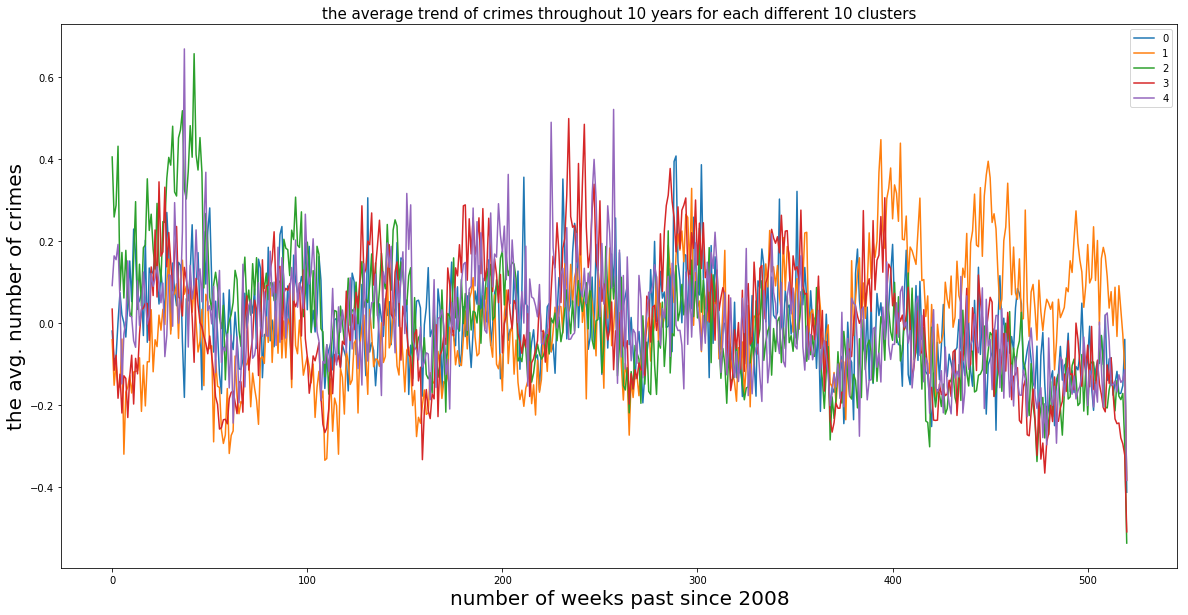

In [39]:
fig = plt.figure(figsize = (20,10))
for i in range(5):
    plt.plot(np.array(cluster[cluster['labels1'] == i].iloc[:,1:522].mean()), label = i)
    plt.legend()
plt.xlabel('number of weeks past since 2008', fontsize=20)
plt.ylabel('the avg. number of crimes', fontsize=20)
plt.title('the average trend of crimes throughout 10 years for each different 10 clusters', fontsize=15)
plt.show()

In [40]:
cluster_real = crime_Cluster.merge(cluster[['labels1']], left_index=True, right_index=True)

In [41]:
cluster_real.head()

Date        2007-12-31 00:00:00  2008-01-07 00:00:00  2008-01-14 00:00:00  \
boro_ct201                                                                  
1000201                     1.0                  1.0                  0.0   
1000202                     4.0                  0.0                  1.0   
1000500                     0.0                  0.0                  0.0   
1000600                     1.0                  0.0                  0.0   
1000700                     4.0                  4.0                  2.0   

Date        2008-01-21 00:00:00  2008-01-28 00:00:00  2008-02-04 00:00:00  \
boro_ct201                                                                  
1000201                     1.0                  0.0                  0.0   
1000202                     0.0                  0.0                  1.0   
1000500                     0.0                  0.0                  0.0   
1000600                     3.0                  1.0                  0.0   
1000700                     3.0                  1.0                  4.0   

Date        2008-02-11 00:00:00  2008-02-18 00:00:00  2008-02-25 00:00:00  \
boro_ct201                                                                  
1000201                     0.0                  1.0                  0.0   
1000202                     0.0                  1.0                  1.0   
1000500                     0.0                  0.0                  0.0   
1000600                     1.0                  0.0                  1.0   
1000700                     4.0                  1.0                  1.0   

Date        2008-03-03 00:00:00   ...     2017-10-30 00:00:00  \
boro_ct201                        ...                           
1000201                     0.0   ...                     1.0   
1000202                     0.0   ...                     0.0   
1000500                     0.0   ...                     0.0   
1000600                     1.0   ...                     4.0   
1000700                     3.0   ...                     0.0   

Date        2017-11-06 00:00:00  2017-11-13 00:00:00  2017-11-20 00:00:00  \
boro_ct201                                                                  
1000201                     0.0                  0.0                  1.0   
1000202                     1.0                  3.0                  0.0   
1000500                     0.0                  0.0                  0.0   
1000600                     2.0                  3.0                  5.0   
1000700                     2.0                  1.0                  1.0   

Date        2017-11-27 00:00:00  2017-12-04 00:00:00  2017-12-11 00:00:00  \
boro_ct201                                                                  
1000201                     0.0                  0.0                  1.0   
1000202                     1.0                  0.0                  1.0   
1000500                     0.0                  0.0                  0.0   
1000600                     3.0                  2.0                  1.0   
1000700                     0.0                  2.0                  3.0   

Date        2017-12-18 00:00:00  2017-12-25 00:00:00  labels1  
boro_ct201                                                     
1000201                     0.0                  0.0        1  
1000202                     0.0                  0.0        2  
1000500                     0.0                  0.0        3  
1000600                     2.0                  3.0        1  
1000700                     2.0                  0.0        2  

[5 rows x 523 columns]

In [43]:
cluster_real.to_csv('clusters_tract_level')

In [64]:
df0 = pd.DataFrame(data=cluster_real[cluster_real['labels1'] == 0].iloc[:,:522].sum())
df1 = pd.DataFrame(data=cluster_real[cluster_real['labels1'] == 1].iloc[:,:522].sum())
df2 = pd.DataFrame(data=cluster_real[cluster_real['labels1'] == 2].iloc[:,:522].sum())
df3 = pd.DataFrame(data=cluster_real[cluster_real['labels1'] == 3].iloc[:,:522].sum())
df4 = pd.DataFrame(data=cluster_real[cluster_real['labels1'] == 4].iloc[:,:522].sum())

In [65]:
df0 = df0.rename(columns={ df0.columns[0]: "Label0" })
df1 = df1.rename(columns={ df1.columns[0]: "Label1" })
df2 = df2.rename(columns={ df2.columns[0]: "Label2" })
df3 = df3.rename(columns={ df3.columns[0]: "Label3" })
df4 = df4.rename(columns={ df4.columns[0]: "Label4" })

In [67]:
df = df0.merge(df1, left_index=True, right_index=True)
df = df.merge(df2, left_index=True, right_index=True)
df = df.merge(df3, left_index=True, right_index=True)
df = df.merge(df4, left_index=True, right_index=True)

In [68]:
df.head()

Label0  Label1  Label2  Label3  Label4
2007-12-31   346.0   491.0   778.0   517.0   338.0
2008-01-07   267.0   425.0   776.0   533.0   315.0
2008-01-14   254.0   378.0   692.0   456.0   321.0
2008-01-21   248.0   402.0   700.0   487.0   322.0
2008-01-28   272.0   379.0   774.0   428.0   344.0

In [69]:
df.to_csv('df_clustered')

### Crime 2017

In [137]:
crime_nyc_2017 = crime_nyc[crime_nyc.CMPLNT_FR_DT.str[-4:] == '2017']

In [138]:
crime_nyc_2017 = crime_nyc_2017[['CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'KY_CD', 'OFNS_DESC', 'LAW_CAT_CD',
                                 'Longitude', 'Latitude']]

In [60]:
crime_nyc_2017.head()

CMPLNT_FR_DT CMPLNT_FR_TM  KY_CD                     OFNS_DESC  \
1538308   12/31/2017     23:55:00    118             DANGEROUS WEAPONS   
1538309   12/31/2017     23:30:00    344  ASSAULT 3 & RELATED OFFENSES   
1538310   12/31/2017     23:10:00    578                 HARRASSMENT 2   
1538311   12/31/2017     23:05:00    118             DANGEROUS WEAPONS   
1538312   12/31/2017     23:00:00    109                 GRAND LARCENY   

          LAW_CAT_CD  Longitude   Latitude  
1538308       FELONY -73.939666  40.639151  
1538309  MISDEMEANOR -73.860463  40.891963  
1538310    VIOLATION -73.936810  40.794094  
1538311       FELONY -73.909792  40.658444  
1538312       FELONY -73.983263  40.761102

In [140]:
# combine lat and lon to one column
crime_nyc_2017['lonlat'] = list(zip(crime_nyc_2017.Longitude, crime_nyc_2017.Latitude))
# Create Point Geometry for based on lonlat column
crime_nyc_2017['geometry'] = crime_nyc_2017[['lonlat']].applymap(lambda x:shapely.geometry.Point(x))
crime_nyc_2017.head()

CMPLNT_FR_DT CMPLNT_FR_TM  KY_CD                     OFNS_DESC  \
1538308   12/31/2017     23:55:00    118             DANGEROUS WEAPONS   
1538309   12/31/2017     23:30:00    344  ASSAULT 3 & RELATED OFFENSES   
1538310   12/31/2017     23:10:00    578                 HARRASSMENT 2   
1538311   12/31/2017     23:05:00    118             DANGEROUS WEAPONS   
1538312   12/31/2017     23:00:00    109                 GRAND LARCENY   

          LAW_CAT_CD  Longitude   Latitude                         lonlat  \
1538308       FELONY -73.939666  40.639151  (-73.939666456, 40.639150769)   
1538309  MISDEMEANOR -73.860463  40.891963  (-73.860462659, 40.891963368)   
1538310    VIOLATION -73.936810  40.794094  (-73.936810155, 40.794093725)   
1538311       FELONY -73.909792  40.658444  (-73.909791753, 40.658443523)   
1538312       FELONY -73.983263  40.761102  (-73.983262987, 40.761101623)   

                                        geometry  
1538308       POINT (-73.939666456 40.639150769)  
1538309  POINT (-73.86046265899999 40.891963368)  
1538310       POINT (-73.936810155 40.794093725)  
1538311  POINT (-73.90979175300001 40.658443523)  
1538312       POINT (-73.983262987 40.761101623)

In [141]:
crime_nyc_2017 = gpd.GeoDataFrame(crime_nyc_2017)

In [17]:
from fiona.crs import from_epsg

In [142]:
crime_nyc_2017.crs = from_epsg(4326)
crime_nyc_2017.crs

{'init': 'epsg:4326', 'no_defs': True}

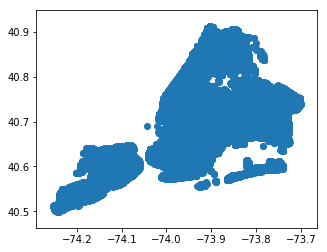

In [64]:
crime_nyc_2017.plot()
plt.show()

In [89]:
# url = "https://data.cityofnewyork.us/api/geospatial/v2h8-6mxf?method=export&format=Shapefile"

In [90]:
# urlb.request.urlretrieve(url, "file.gz")

('file.gz', <http.client.HTTPMessage at 0x7f4e57cc6208>)

In [91]:
# !unzip file.gz

Archive:  file.gz
  inflating: geo_export_b53baefe-6375-46eb-8e83-144c3913a376.dbf  
  inflating: geo_export_b53baefe-6375-46eb-8e83-144c3913a376.shp  
  inflating: geo_export_b53baefe-6375-46eb-8e83-144c3913a376.shx  
  inflating: geo_export_b53baefe-6375-46eb-8e83-144c3913a376.prj  


In [65]:
census_block = gpd.GeoDataFrame.from_file("geo_export_b53baefe-6375-46eb-8e83-144c3913a376.shp")
census_block.head()

bctcb2010 boro_code      boro_name cb2010  ct2010     shape_area  \
0  50009001000         5  Staten Island   1000  000900  244589.603884   
1  50020011000         5  Staten Island   1000  002001  111006.286826   
2  50027001000         5  Staten Island   1000  002700  150406.766022   
3  50040001000         5  Staten Island   1000  004000  141296.561149   
4  50064001000         5  Staten Island   1000  006400  200784.983607   

    shape_leng                                           geometry  
0  2508.948115  POLYGON ((-74.07920577013245 40.64343078374567...  
1  1345.886422  POLYGON ((-74.07061992438017 40.61085506705416...  
2  1703.381172  POLYGON ((-74.07524403910642 40.62600632452712...  
3  1511.173743  POLYGON ((-74.08708799689826 40.61116883123925...  
4  1978.243852  POLYGON ((-74.07643744511992 40.60100160655585...

In [156]:
# url2 = 'https://data.cityofnewyork.us/api/geospatial/fxpq-c8ku?method=export&format=Shapefile'

In [157]:
# urlb.request.urlretrieve(url2, "file2.gz")

('file2.gz', <http.client.HTTPMessage at 0x7f4e58028860>)

In [158]:
# !unzip file2.gz

Archive:  file2.gz
  inflating: geo_export_528e5298-ab8f-4cf6-b6ad-de2f22d1f1a0.dbf  
  inflating: geo_export_528e5298-ab8f-4cf6-b6ad-de2f22d1f1a0.shp  
  inflating: geo_export_528e5298-ab8f-4cf6-b6ad-de2f22d1f1a0.shx  
  inflating: geo_export_528e5298-ab8f-4cf6-b6ad-de2f22d1f1a0.prj  


In [20]:
census_track = gpd.GeoDataFrame.from_file("geo_export_528e5298-ab8f-4cf6-b6ad-de2f22d1f1a0.shp")
census_track.head()

boro_code boro_ct201      boro_name cdeligibil  ct2010 ctlabel ntacode  \
0         5    5000900  Staten Island          I  000900       9    SI22   
1         1    1009800      Manhattan          I  009800      98    MN19   
2         1    1010000      Manhattan          I  010000     100    MN19   
3         1    1010200      Manhattan          I  010200     102    MN17   
4         1    1010400      Manhattan          I  010400     104    MN17   

                                     ntaname  puma    shape_area   shape_leng  \
0  West New Brighton-New Brighton-St. George  3903  2.497010e+06  7729.016794   
1                    Turtle Bay-East Midtown  3808  1.906016e+06  5534.199811   
2                    Turtle Bay-East Midtown  3808  1.860938e+06  5692.168737   
3                      Midtown-Midtown South  3807  1.860993e+06  5687.802439   
4                      Midtown-Midtown South  3807  1.864600e+06  5693.036367   

                                            geometry  
0  POLYGON ((-74.07920577013245 40.64343078374567...  
1  POLYGON ((-73.96432543478758 40.75638153099091...  
2  POLYGON ((-73.96802436915851 40.75957814005282...  
3  POLYGON ((-73.97124277307127 40.76093641847906...  
4  POLYGON ((-73.97445730550224 40.76229308352487...

In [67]:
census_block.crs = from_epsg(4326)
census_block.crs

{'init': 'epsg:4326', 'no_defs': True}

In [21]:
census_track.crs = from_epsg(4326)
census_track.crs

{'init': 'epsg:4326', 'no_defs': True}

In [69]:
crime2017_with_blocks = gpd.sjoin(census_block, crime_nyc_2017, op='contains')

In [143]:
crime2017_with_tracks = gpd.sjoin(census_track, crime_nyc_2017, op='contains')

In [144]:
part1_2017 = crime2017_with_tracks[crime2017_with_tracks.OFNS_DESC.isin(['BURGLARY', 'ARSON', 
                                                    'GRAND LARCENY', 'ROBBERY',
                                                    'GRAND LARCENY OF MOTOR VEHICLE', 'FELONY ASSAULT', 
                                                    'RAPE', 
                                                    'MURDER & NON-NEGL. MANSLAUGHTER'])]

In [72]:
part1_2017.head()

boro_code boro_ct201      boro_name cdeligibil  ct2010 ctlabel ntacode  \
0         5    5000900  Staten Island          I  000900       9    SI22   
0         5    5000900  Staten Island          I  000900       9    SI22   
0         5    5000900  Staten Island          I  000900       9    SI22   
0         5    5000900  Staten Island          I  000900       9    SI22   
0         5    5000900  Staten Island          I  000900       9    SI22   

                                     ntaname  puma    shape_area  \
0  West New Brighton-New Brighton-St. George  3903  2.497010e+06   
0  West New Brighton-New Brighton-St. George  3903  2.497010e+06   
0  West New Brighton-New Brighton-St. George  3903  2.497010e+06   
0  West New Brighton-New Brighton-St. George  3903  2.497010e+06   
0  West New Brighton-New Brighton-St. George  3903  2.497010e+06   

               ...                \
0              ...                 
0              ...                 
0              ...                 
0              ...                 
0              ...                 

                                            geometry index_right  \
0  POLYGON ((-74.07920577013245 40.64343078374567...     1720863   
0  POLYGON ((-74.07920577013245 40.64343078374567...     1743758   
0  POLYGON ((-74.07920577013245 40.64343078374567...     1650099   
0  POLYGON ((-74.07920577013245 40.64343078374567...     1667221   
0  POLYGON ((-74.07920577013245 40.64343078374567...     1943667   

   CMPLNT_FR_DT CMPLNT_FR_TM KY_CD       OFNS_DESC LAW_CAT_CD  Longitude  \
0    08/13/2017     08:00:00   106  FELONY ASSAULT     FELONY -74.081169   
0    07/27/2017     09:05:00   105         ROBBERY     FELONY -74.082225   
0    09/23/2017     05:00:00   109   GRAND LARCENY     FELONY -74.083570   
0    09/22/2017     01:30:00   109   GRAND LARCENY     FELONY -74.083570   
0    02/21/2017     19:00:00   106  FELONY ASSAULT     FELONY -74.083570   

    Latitude                         lonlat  
0  40.644095  (-74.081168738, 40.644095032)  
0  40.644435  (-74.082224962, 40.644434635)  
0  40.642680  (-74.083570455, 40.642679747)  
0  40.642680  (-74.083570455, 40.642679747)  
0  40.642680  (-74.083570455, 40.642679747)  

[5 rows x 21 columns]

In [92]:
part1_2017.columns

Index(['boro_code', 'boro_ct201', 'boro_name', 'cdeligibil', 'ct2010',
       'ctlabel', 'ntacode', 'ntaname', 'puma', 'shape_area', 'shape_leng',
       'geometry', 'index_right', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'KY_CD',
       'OFNS_DESC', 'LAW_CAT_CD', 'Longitude', 'Latitude', 'lonlat'],
      dtype='object')

In [182]:
felony_2017 = crime2017_with_tracks[crime2017_with_tracks['LAW_CAT_CD'] == 'FELONY']

In [170]:
part1_2017_hist = part1_2017.groupby('OFNS_DESC').count()[['boro_ct201']].reset_index().sort_values(by = 'boro_ct201', 
                                                                                   ascending=False)

In [177]:
part1_2017_hist['crime_list'] = ['LARCENY', 'ASSAULT', 'ROBBERY', 'BURGLARY', 
                                 'AUTO THEFT', 'RAPE', 'ARSON', 'MURDER']

In [178]:
part1_2017_hist.head()

OFNS_DESC  boro_ct201  crime_list
3                   GRAND LARCENY       40930     LARCENY
2                  FELONY ASSAULT       20008     ASSAULT
7                         ROBBERY       13960     ROBBERY
1                        BURGLARY       11990    BURGLARY
4  GRAND LARCENY OF MOTOR VEHICLE        5573  AUTO THEFT

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


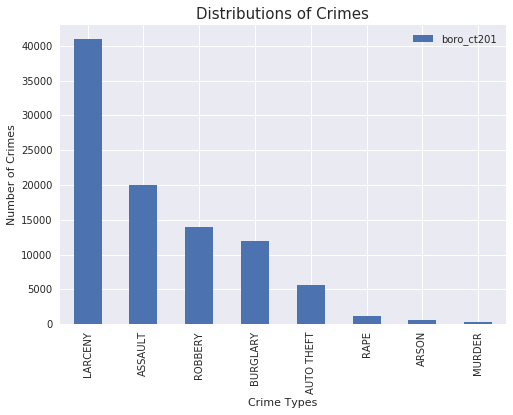

In [187]:
#part1_2017_hist.sort_values('importances',inplace=True)
part1_2017_hist.plot(kind='bar',y='boro_ct201', x='crime_list')
plt.title("Distributions of Crimes", size=15)
plt.ylabel('Number of Crimes')
plt.xlabel('Crime Types')
plt.show()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


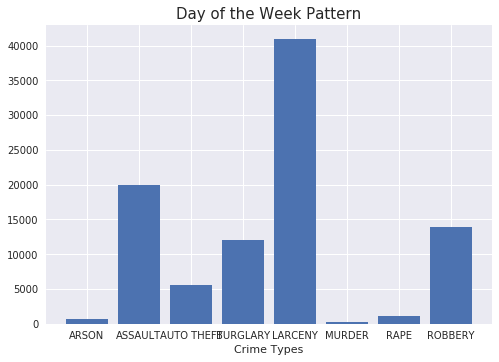

In [182]:
plt.bar(crime_list, part1_2017_hist['boro_ct201'])
plt.title("Day of the Week Pattern", size=15)
plt.ylabel('')
plt.xlabel('Crime Types')
plt.show()

In [76]:
ct_2017 = part1_2017.groupby(['boro_ct201', 'OFNS_DESC'])['OFNS_DESC'].count().unstack().reset_index()

In [77]:
len(ct_2017)

2152

In [79]:
ct_2017['CRIME_SUM'] = ct_2017[['ARSON', 'BURGLARY', 'FELONY ASSAULT', 'GRAND LARCENY' ,
                    'GRAND LARCENY OF MOTOR VEHICLE',
                    'MURDER & NON-NEGL. MANSLAUGHTER', 'RAPE', 'ROBBERY']].sum(axis = 1, skipna = True) 

In [80]:
ct_2017.head()

OFNS_DESC boro_ct201  ARSON  BURGLARY  FELONY ASSAULT  GRAND LARCENY  \
0            1000201    NaN       NaN             8.0            9.0   
1            1000202    NaN       5.0             9.0           17.0   
2            1000600    NaN      16.0            25.0           40.0   
3            1000700    NaN       3.0             6.0           54.0   
4            1000800    NaN      13.0            10.0           33.0   

OFNS_DESC  GRAND LARCENY OF MOTOR VEHICLE  MURDER & NON-NEGL. MANSLAUGHTER  \
0                                     NaN                              NaN   
1                                     2.0                              NaN   
2                                     1.0                              NaN   
3                                     2.0                              NaN   
4                                     NaN                              NaN   

OFNS_DESC  RAPE  ROBBERY  CRIME_SUM  
0           NaN      3.0       20.0  
1           NaN      4.0       37.0  
2           NaN     25.0      107.0  
3           NaN      5.0       70.0  
4           NaN     12.0       68.0

#### Note

 - number of part1 ~ 95K
 - number of census track ~ 2100

In [82]:
ct_2017 = ct_2017.merge(census_track, left_on="boro_ct201", right_on='boro_ct201')
ct_2017.head()

OFNS_DESC boro_ct201  ARSON  BURGLARY  FELONY ASSAULT  GRAND LARCENY  \
0            1000201    NaN       NaN             8.0            9.0   
1            1000202    NaN       5.0             9.0           17.0   
2            1000600    NaN      16.0            25.0           40.0   
3            1000700    NaN       3.0             6.0           54.0   
4            1000800    NaN      13.0            10.0           33.0   

OFNS_DESC  GRAND LARCENY OF MOTOR VEHICLE  MURDER & NON-NEGL. MANSLAUGHTER  \
0                                     NaN                              NaN   
1                                     2.0                              NaN   
2                                     1.0                              NaN   
3                                     2.0                              NaN   
4                                     NaN                              NaN   

OFNS_DESC  RAPE  ROBBERY  CRIME_SUM  \
0           NaN      3.0       20.0   
1           NaN      4.0       37.0   
2           NaN     25.0      107.0   
3           NaN      5.0       70.0   
4           NaN     12.0       68.0   

OFNS_DESC                        ...                          boro_name  \
0                                ...                          Manhattan   
1                                ...                          Manhattan   
2                                ...                          Manhattan   
3                                ...                          Manhattan   
4                                ...                          Manhattan   

OFNS_DESC cdeligibil  ct2010 ctlabel ntacode  \
0                  E  000201    2.01    MN28   
1                  E  000202    2.02    MN28   
2                  E  000600       6    MN28   
3                  I  000700       7    MN25   
4                  E  000800       8    MN27   

OFNS_DESC                            ntaname  puma    shape_area   shape_leng  \
0                            Lower East Side  3809  9.715994e+05  4748.325960   
1                            Lower East Side  3809  3.315114e+06  8568.089235   
2                            Lower East Side  3809  2.583418e+06  6970.634699   
3          Battery Park City-Lower Manhattan  3810  2.442012e+06  9802.917997   
4                                  Chinatown  3809  2.366871e+06  6362.785762   

OFNS_DESC                                           geometry  
0          POLYGON ((-73.98449647076764 40.70950966393941...  
1          (POLYGON ((-73.98237340572007 40.7055433504376...  
2          POLYGON ((-73.99022012603876 40.71440493989796...  
3          (POLYGON ((-73.99799957540132 40.6987976855442...  
4          POLYGON ((-73.99190544366451 40.70952539658225...  

[5 rows x 21 columns]

In [89]:
ct_2017[ct_2017['CRIME_SUM'] > 250].sort_values(by = 'CRIME_SUM', ascending=False)

OFNS_DESC boro_ct201  ARSON  BURGLARY  FELONY ASSAULT  GRAND LARCENY  \
105          1010900    1.0      51.0            17.0          346.0   
118          1011900    2.0      10.0            44.0          323.0   
286          2000100    8.0       NaN           361.0            1.0   
324          2006500    2.0      25.0            88.0          168.0   
48           1005200    NaN      20.0            16.0          233.0   
101          1010400    1.0       7.0             4.0          241.0   
113          1011402    NaN      29.0             8.0          201.0   
46           1004900    NaN      16.0             9.0          217.0   
72           1007600    NaN      24.0            18.0          191.0   

OFNS_DESC  GRAND LARCENY OF MOTOR VEHICLE  MURDER & NON-NEGL. MANSLAUGHTER  \
105                                   3.0                              NaN   
118                                   1.0                              1.0   
286                                   NaN                              NaN   
324                                   8.0                              NaN   
48                                    NaN                              NaN   
101                                   NaN                              NaN   
113                                   2.0                              NaN   
46                                    1.0                              NaN   
72                                    1.0                              1.0   

OFNS_DESC  RAPE  ROBBERY  CRIME_SUM  \
105         NaN     17.0      435.0   
118         NaN     22.0      403.0   
286         NaN      2.0      372.0   
324         NaN     65.0      356.0   
48          NaN     13.0      282.0   
101         NaN     12.0      265.0   
113         NaN     17.0      257.0   
46          NaN     13.0      256.0   
72          NaN     18.0      253.0   

OFNS_DESC                        ...                          boro_name  \
105                              ...                          Manhattan   
118                              ...                          Manhattan   
286                              ...                              Bronx   
324                              ...                              Bronx   
48                               ...                          Manhattan   
101                              ...                          Manhattan   
113                              ...                          Manhattan   
46                               ...                          Manhattan   
72                               ...                          Manhattan   

OFNS_DESC cdeligibil  ct2010 ctlabel ntacode  \
105                I  010900     109    MN17   
118                I  011900     119    MN17   
286                I  000100       1    BX98   
324                I  006500      65    BX34   
48                 I  005200      52    MN13   
101                I  010400     104    MN17   
113                I  011402  114.02    MN40   
46                 I  004900      49    MN24   
72                 I  007600      76    MN17   

OFNS_DESC                                     ntaname  puma    shape_area  \
105                             Midtown-Midtown South  3807  1.891365e+06   
118                             Midtown-Midtown South  3807  1.911311e+06   
286                                     Rikers Island  3710  1.816383e+07   
324                    Melrose South-Mott Haven North  3710  2.816028e+06   
48         Hudson Yards-Chelsea-Flatiron-Union Square  3807  1.815429e+06   
101                             Midtown-Midtown South  3807  1.864600e+06   
113                     Upper East Side-Carnegie Hill  3805  1.063547e+06   
46             SoHo-TriBeCa-Civic Center-Little Italy  3810  2.226124e+06   
72                              Midtown-Midtown South  3807  1.873518e+06   

OFNS_DESC    shape_leng                                           geometry  
105         5703.531520  PO

In [84]:
ct_2017 = gpd.GeoDataFrame(ct_2017)

In [91]:
ct_2017.columns

Index(['boro_ct201', 'ARSON', 'BURGLARY', 'FELONY ASSAULT', 'GRAND LARCENY',
       'GRAND LARCENY OF MOTOR VEHICLE', 'MURDER & NON-NEGL. MANSLAUGHTER',
       'RAPE', 'ROBBERY', 'CRIME_SUM', 'boro_code', 'boro_name', 'cdeligibil',
       'ct2010', 'ctlabel', 'ntacode', 'ntaname', 'puma', 'shape_area',
       'shape_leng', 'geometry'],
      dtype='object', name='OFNS_DESC')

In [2]:
ct_2017.head()

NameError: name 'ct_2017' is not defined

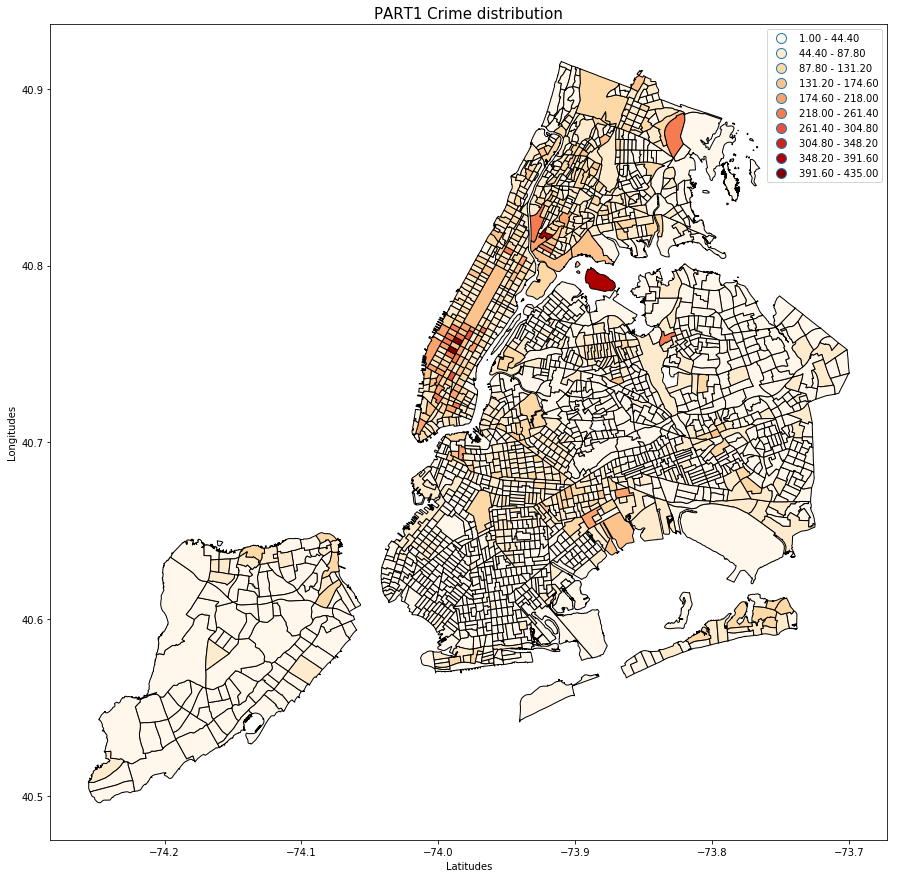

In [85]:
#### from matplotlib.colors import Normalize
from matplotlib import cm
f, ax = plt.subplots(figsize=(15,15))
ax.get_xaxis().set_visible(True)
ax.get_yaxis().set_visible(True)
ct_2017.plot(column='CRIME_SUM',cmap='OrRd',alpha=1,
                  lw=1, ax=ax, scheme="Equal_interval", edgecolor="black", legend=True, k=10)
#linkNYC.plot(ax=ax, marker='o', c="date_link_", 
             #markersize=5, cmap="OrRd")
#norm = Normalize(vmin=df_bars['Night1'].min(), vmax=df_bars['Night1'].max())
#n_cmap = cm.ScalarMappable(norm=norm, cmap='bone')
#n_cmap.set_array([])
#ax.get_figure().colorbar(n_cmap)
plt.title("PART1 Crime distribution", size=15)
plt.ylabel('Longitudes')
plt.xlabel('Latitudes')
plt.show()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/function_base.py:3142: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


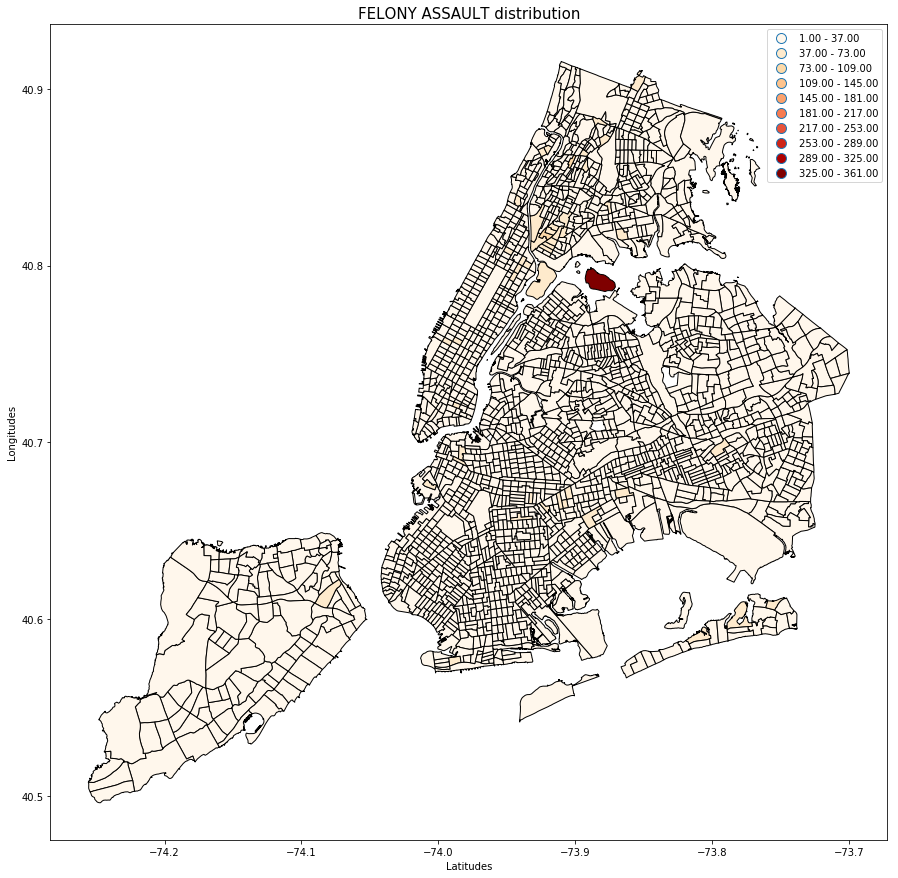

In [198]:
#### from matplotlib.colors import Normalize
from matplotlib import cm
f, ax = plt.subplots(figsize=(15,15))
ax.get_xaxis().set_visible(True)
ax.get_yaxis().set_visible(True)
ct_2017.plot(column='FELONY ASSAULT',cmap='OrRd',alpha=1,
                  lw=1, ax=ax, scheme="Equal_interval", edgecolor="black", legend=True, k=10)
#linkNYC.plot(ax=ax, marker='o', c="date_link_", 
             #markersize=5, cmap="OrRd")
#norm = Normalize(vmin=df_bars['Night1'].min(), vmax=df_bars['Night1'].max())
#n_cmap = cm.ScalarMappable(norm=norm, cmap='bone')
#n_cmap.set_array([])
#ax.get_figure().colorbar(n_cmap)
plt.title("FELONY ASSAULT distribution", size=15)
plt.ylabel('Longitudes')
plt.xlabel('Latitudes')
plt.show()

In [204]:
ny_poverty = pd.read_csv('new_york_poverty.csv', skiprows=1)

In [242]:
kings_poverty = pd.read_csv('kings_poverty.csv', skiprows=1)

In [219]:
bronx_poverty = pd.read_csv('bronx_poverty.csv', skiprows=1)

In [220]:
queens_poverty = pd.read_csv('queens_poverty.csv', skiprows=1)

In [221]:
richmond_poverty = pd.read_csv('richmond_poverty.csv', skiprows=1)

In [244]:
kings_poverty = kings_poverty[[1,5]]
kings_poverty['Id2'] = kings_poverty.Id2.astype(str).str[4:]
kings_poverty.head()

Id2 All families  - Percent below poverty level; Estimate; Families
0  7000100                                                0.0             
1  7000200                                               27.5             
2  7000301                                                0.0             
3  7000501                                                2.5             
4  7000502                                                0.0

In [245]:
ny_poverty = ny_poverty[[1,5]]
ny_poverty['Id2'] = ny_poverty.Id2.astype(str).str[4:]

bronx_poverty = bronx_poverty[[1,5]]
bronx_poverty['Id2'] = bronx_poverty.Id2.astype(str).str[4:]

queens_poverty = queens_poverty[[1,5]]
queens_poverty['Id2'] = queens_poverty.Id2.astype(str).str[4:]

richmond_poverty = richmond_poverty[[1,5]]
richmond_poverty['Id2'] = richmond_poverty.Id2.astype(str).str[4:]

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [258]:
poverty = ny_poverty
poverty = poverty.append(kings_poverty)
poverty = poverty.append(bronx_poverty)
poverty = poverty.append(queens_poverty)
poverty = poverty.append(richmond_poverty)

In [262]:
poverty['pov_perc'] = poverty[[1]]

In [266]:
poverty = poverty[[0,2]]
poverty.head()

Id2 pov_perc
0  1000100        -
1  1000201     41.1
2  1000202     18.8
3  1000500        -
4  1000600     34.5

In [286]:
poverty[poverty['Id2'] == '1000600']

Id2 pov_perc
4  1000600     34.5
3  1000600      4.9

In [284]:
len(poverty[poverty['pov_perc'] == '-'])

52

In [273]:
ct_poverty = ct_2017.merge(poverty, how = 'left', left_on="boro_ct201", right_on='Id2')

In [283]:
ct_poverty

OFNS_DESC boro_ct201  BURGLARY  FELONY ASSAULT  GRAND LARCENY  \
0            1000201       NaN             8.0            9.0   
1            1000202       5.0             9.0           17.0   
2            1000600      16.0            25.0           40.0   
3            1000600      16.0            25.0           40.0   
4            1000700       3.0             6.0           54.0   
5            1000700       3.0             6.0           54.0   
6            1000800      13.0            10.0           33.0   
7            1000800      13.0            10.0           33.0   
8            1000900       4.0            13.0           69.0   
9            1001001       NaN             NaN            5.0   
10           1001002       NaN            23.0           12.0   
11           1001200       3.0            16.0           21.0   
12           1001200       3.0            16.0           21.0   
13           1001300       7.0            18.0          141.0   
14           1001401       NaN             2.0            7.0   
15           1001402       6.0            10.0           36.0   
16           1001501       6.0            10.0           51.0   
17           1001502       6.0             3.0           58.0   
18           1001600      10.0            23.0           57.0   
19           1001600      10.0            23.0           57.0   
20           1001800      12.0            21.0          139.0   
21           1001800      12.0            21.0          139.0   
22           1002000       1.0             6.0           10.0   
23           1002000       1.0             6.0           10.0   
24           1002100       3.0             7.0          105.0   
25           1002201       3.0            20.0           42.0   
26           1002202       4.0             1.0           10.0   
27           1002400       NaN            16.0            9.0   
28           1002400       NaN            16.0            9.0   
29           1002500       1.0            10.0            5.0   
...              ...       ...             ...            ...   
2296         5022800       NaN             2.0            9.0   
2297         5023100       7.0            12.0           23.0   
2298         5023100       7.0            12.0           23.0   
2299         5023900       8.0            18.0            6.0   
2300         5023900       8.0            18.0            6.0   
2301         5024401       4.0             NaN            9.0   
2302         5024402       1.0             NaN            7.0   
2303         5024700       2.0             5.0           14.0   
2304         5024700       2.0             5.0           14.0   
2305         5024800       6.0             7.0           27.0   
2306         5024800       6.0             7.0           27.0   
2307         5025100       1.0             3.0            9.0   
2308         5025100       1.0             3.0            9.0   
2309         5027301       3.0             1.0            6.0   
2310         5027302       4.0             2.0            3.0   
2311         5027702       3.0             8.0           70.0   
2312         5027704       NaN             3.0            4.0   
2313         5027705       1.0             1.0            5.0   
2314         5027706       5.0             2.0           18.0   
2315         5027900       2.0             2.0            5.0   
2316         5027900       2.0             2.0            5.0   
2317         5029102       3.0             3.0           22.0   
2318         5029103       7.0            11.0           11.0   
2319         5029104       8.0             5.0           11.0   
2320         5030301       1.0             3.0            5.0   
2321         5030302       2.0            14.0           23.0   
2322         5031901       1.0            21.0           18.0   
2323         5031902      10.0            11.0            3.0   
2324         5032300       6.0            15.0            8.0   
2325         5032300       6.0     